In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u

import importlib as imp

import regions
from regions import Regions

In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import outflow_plots as op
import cutout_manager as cm
imp.reload(op)

<module 'outflow_plots' from '/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/outflow_plots.py'>

In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


# Examples of how to use Outflow Plots Tool

First, have an object in mind that you think had outflows. 
Make sure to have the object's coordinate available as a SkyCoord object.

In [5]:
clump1 = SkyCoord('17:46:19.2287619119', '-28:38:29.2978617171', unit=(u.hourangle, u.deg))
clump2 = SkyCoord('17:46:19.5945777603', '-28:38:09.9402161687', unit=(u.hourangle, u.deg))

It is also recommended to have a base image to plot the contours on top of. 
You can also plot the contours on top of a moment map made by outflow_plots

In [6]:
B3_cont_fn = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'

For zoom-in cutouts like this one, I prefer to make the cutout size the same for the base image and outflows.

In [7]:
l = w = 25*u.arcsec
cutout_c1 = cm.get_cutout(B3_cont_fn, clump1, l, w, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Initialize the OutflowPlot object with both a position and size of the cutout box. 

Set the filename to the spectral cube and the rest frequency.

If a rest frequency is not set, then the rest frequency will be chosen from the cube's header. 

For spectral cubes with many lines, be sure to set the rest frequency for the line required.

In [110]:
cube_fn = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s38_0.Sgr_A_star_sci.spw27.cube.I.iter1.image.pbcor.fits'
restfreq = 86.84696*u.GHz # ACES SiO 2-1
outflow_c1 = op.OutflowPlot(clump1, l=l, w=w, cube_fn=cube_fn, restfreq=restfreq)

To plot the outflows, the fastest way is to call the `plot_outflows` function for the object. 

Make sure to specify the velocities!

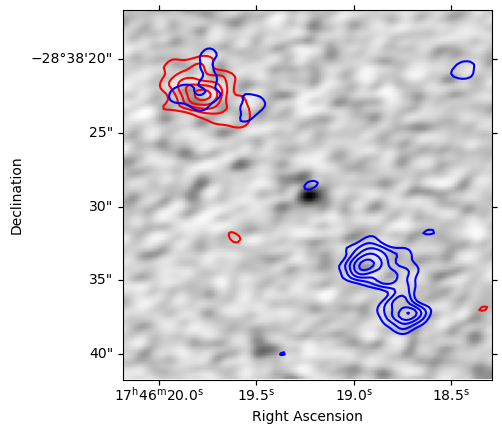

In [111]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

You can specify the type of levels, which are the default Carta contour levels with some adjustments. 

The options are 'start-step-multiplier', 'min-max-scaling', 'percentages', and 'mean-sigma-list'.

By default, the 'percentages' is selected.

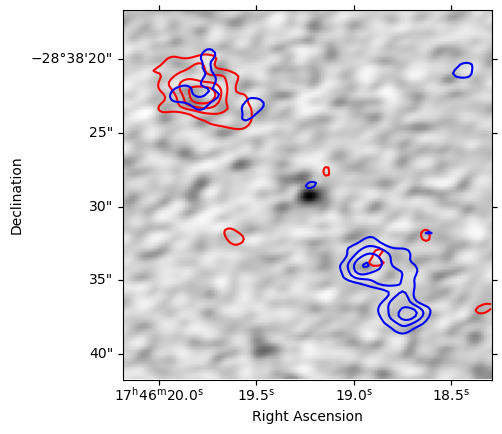

In [148]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax, levels='start-step-multiplier')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

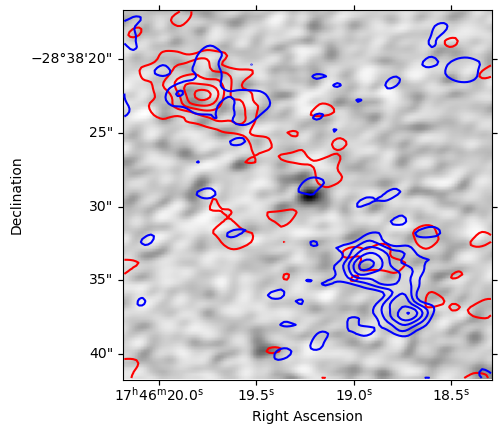

In [127]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax, levels='min-max-scaling')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

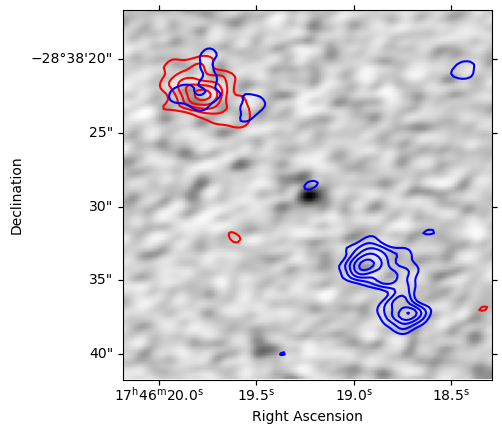

In [140]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax, levels='percentages')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

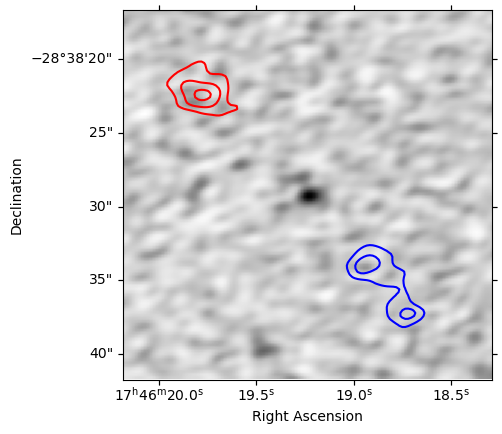

In [139]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax, levels='mean-sigma-list')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

Specifying a list for the levels is also viable.

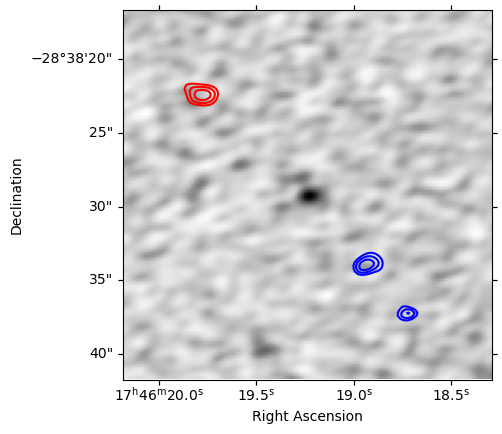

In [156]:
mom0 = outflow_c1.get_moment0(-60*u.km/u.s, -55*u.km/u.s)
blue_levels = op.percentages(mom0.data, nlevels=3, lower=80, upper=99.9)

mom0 = outflow_c1.get_moment0(-55*u.km/u.s, -50*u.km/u.s)
red_levels = op.percentages(mom0.data, nlevels=3, lower=80, upper=99.9)

ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1.plot_moment0_contours(vmin=-60*u.km/u.s, vmax=-55*u.km/u.s, ax=ax, levels=blue_levels, colors='blue')
outflow_c1.plot_moment0_contours(vmin=-55*u.km/u.s, vmax=-50*u.km/u.s, ax=ax, levels=red_levels, colors='red')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

You can also specify a region.

In [160]:
reg = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/outflow_c1.region')
outflow_c1_reg = op.OutflowPlot(clump1, cube_fn=cube_fn, restfreq=restfreq, reg=reg[0])

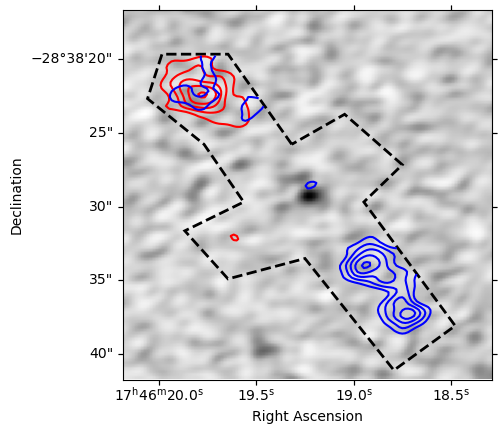

In [163]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1_reg.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
reg[0].to_pixel(cutout_c1.wcs).plot(ax=ax, edgecolor='k', facecolor='none', linestyle='dashed')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

You do not need to specify the size or position if a region is set. 

In [170]:
reg_R = regions.CircleSkyRegion(clump1, radius=12*u.arcsec)
outflow_c1_reg2 = op.OutflowPlot(cube_fn=cube_fn, restfreq=restfreq, reg=reg_R)

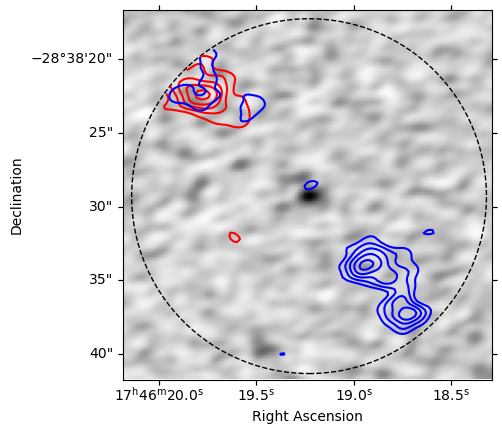

In [171]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_c1_reg2.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
reg_R.to_pixel(cutout_c1.wcs).plot(ax=ax, edgecolor='k', facecolor='none', linestyle='dashed')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

In [ ]:
try:
    outflow_error = op.OutflowPlot()
except ValueError as e:
    print(e)

Either position or reg must be provided.


You can also use a list of regions.

In [179]:
reg_list = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/outflow_list.region')
isinstance(reg_list, regions.Regions)

True

In [180]:
outflow_list = op.OutflowPlot(cube_fn=cube_fn, restfreq=restfreq, reg=reg_list)

In [181]:
pos = SkyCoord('17:46:19.3381032821', '-28:38:23.4968307111', unit=(u.hourangle, u.deg))
ll = 40*u.arcsec
ww = 30*u.arcsec
cutout_new = cm.get_cutout(B3_cont_fn, pos, ll, ww, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


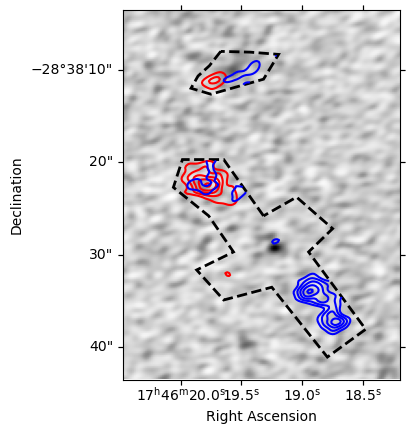

In [184]:
ax = plt.subplot(projection=cutout_new.wcs)
im = ax.imshow(cutout_new.data, cmap='Greys')
outflow_list.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
for r in reg_list:
    r.to_pixel(cutout_new.wcs).plot(ax=ax, edgecolor='k', facecolor='none', linestyle='dashed')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

If you have all of the spectral cubes for an ACES field downloaded, you can easily create contour plots using any line included in the ACES line list.

In [190]:
line = 'SiO 2-1'
outflow_ACES_SiO = op.quickplot_ACES(line, clump1, l=l, w=w)

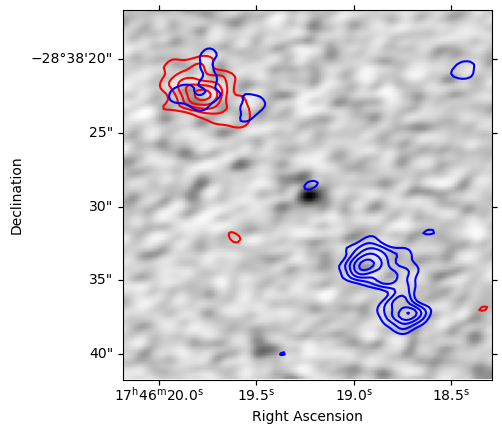

In [191]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
outflow_ACES_SiO.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

In [8]:
line = 'CS 2-1'
outflow_ACES_CS = op.quickplot_ACES(line, clump1, l=l, w=w)

In [9]:
mom0_blue = outflow_ACES_CS.get_moment0(-60*u.km/u.s, -55*u.km/u.s)
blue_levels = op.percentages(mom0_blue.data, nlevels=3, lower=80, upper=99.9)

mom0_red = outflow_ACES_CS.get_moment0(-55*u.km/u.s, -50*u.km/u.s)
red_levels = op.percentages(mom0_red.data, nlevels=3, lower=80, upper=99.9)

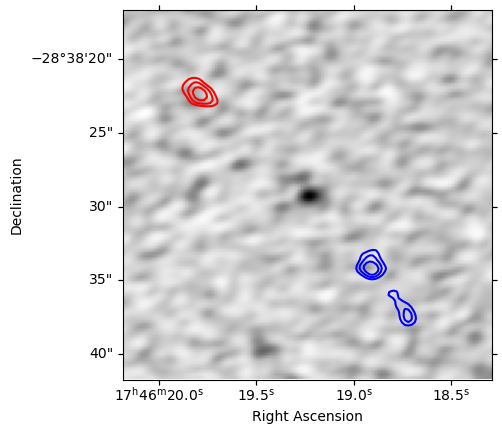

In [10]:
ax = plt.subplot(projection=cutout_c1.wcs)
im = ax.imshow(cutout_c1.data, cmap='Greys')
op.plot_proj_contours(mom0_blue, vmin=-60*u.km/u.s, vmax=-55*u.km/u.s, ax=ax, levels=blue_levels, colors='blue')
op.plot_proj_contours(mom0_red, vmin=-55*u.km/u.s, vmax=-50*u.km/u.s, ax=ax, levels=red_levels, colors='red')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')